# Exploaratory data analysis

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv ('C:/Users/DELL/Downloads/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Missing Values

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Correlation between Sales,Quantity,Discount,Profit

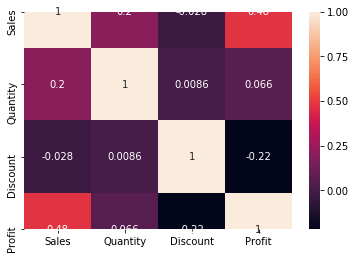

In [10]:
corelation=df[['Sales','Quantity','Discount','Profit']].corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000145C23BD048>,
      dtype=object)

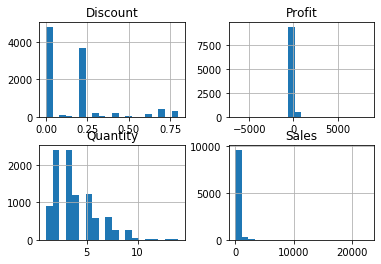

In [11]:
df1=df[['Profit','Sales','Discount','Quantity']]
df1.hist(bins=20)

# Graph of Sales,Profit and Discount

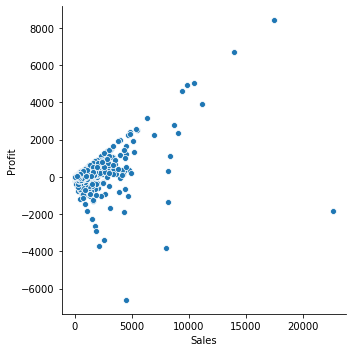

In [12]:
sns.relplot(x='Sales',y='Profit',data=df)

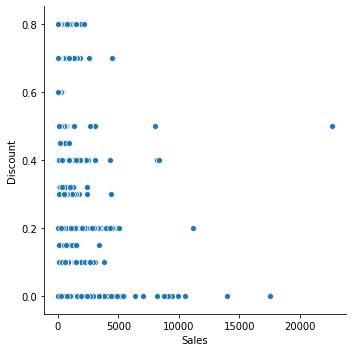

In [13]:
sns.relplot(x='Sales',y='Discount',data=df)

# Bar Graph of State vs Profit

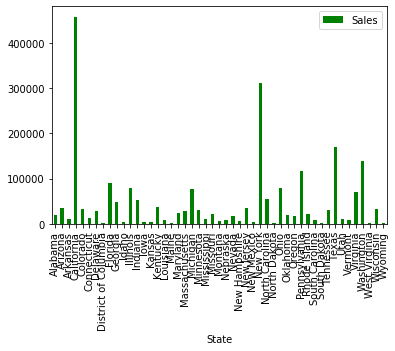

In [19]:
df1=df[['State','Sales']]
df1=df1.set_index('State')
df1=df1.groupby(level=0).sum()
df1=df1.reset_index()
df1.plot.bar(x='State',y='Sales',color='green')

# Pie chart : Category vs Profit and Sales

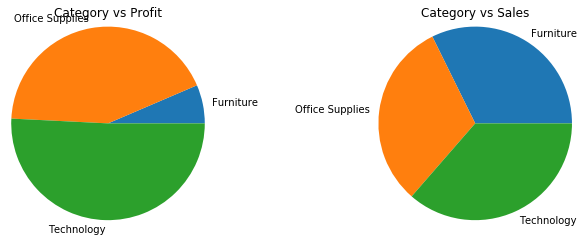

In [21]:
df1=df[['Category','Profit','Sales']]
df1=df1.set_index('Category')
df1=df1.groupby(level=0).sum()
prof=list(df1['Profit'])
sale=list(df1['Sales'])
ind=df1.index.values.tolist()

fig = plt.figure()

ax1 = fig.add_axes([0, 0, .5, 0.7], aspect=1)
ax1.pie(prof, labels=ind, radius = 1.2)
ax2 = fig.add_axes([.7, .0, .8, .7], aspect=1)
ax2.pie(sale, labels=ind, radius = 1.2)
ax1.set_title('Category vs Profit')
ax2.set_title('Category vs Sales')
plt.show()

# Bar graph of Ship Mode vs Sales

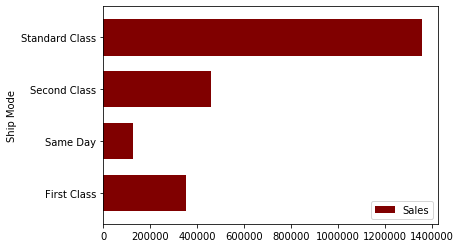

In [25]:
df1=df[['Ship Mode','Sales']]
df1=df1.set_index('Ship Mode')
df1=df1.groupby(level=0).sum()
df1=df1.reset_index()
df1.plot.barh(x='Ship Mode',y='Sales',color='maroon',width=0.7)

# Pie chart of Ship Mode vs Profit

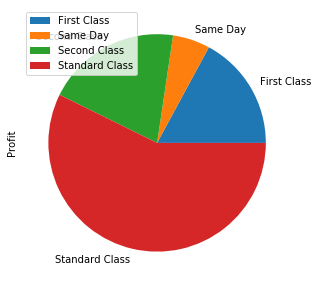

In [26]:
df1=df[['Ship Mode','Profit']]
df1=df1.set_index('Ship Mode')
df1=df1.groupby(level=0).sum()
df1.plot.pie(y='Profit',figsize=(5,5))